In [1]:
%matplotlib qt5
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mne.__version__

'0.18.2'

In [2]:
eeg_data = np.genfromtxt('/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy/p300/1/test.csv', delimiter=',').transpose()
print(eeg_data)
eeg_data = eeg_data / 1000

[[104. 102. 101. ...  -8.  -8.  -9.]
 [ 96.  94.  93. ...  -5.  -5.  -5.]
 [ 94.  92.  91. ... -12. -13. -13.]
 ...
 [ 99. 100.  98. ...  -9. -10. -10.]
 [ 99.  99.  98. ...   3.   4.   5.]
 [ 96.  97.  96. ...  10.  11.  13.]]


In [3]:
event_data = np.genfromtxt('/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy/p300/1/test_events.csv', delimiter=',').transpose()
print(event_data)

[0. 0. 1. ... 0. 0. 0.]


In [4]:
p300_data = np.concatenate((eeg_data, event_data[None, :]))
print(p300_data)

[[ 0.104  0.102  0.101 ... -0.008 -0.008 -0.009]
 [ 0.096  0.094  0.093 ... -0.005 -0.005 -0.005]
 [ 0.094  0.092  0.091 ... -0.012 -0.013 -0.013]
 ...
 [ 0.099  0.099  0.098 ...  0.003  0.004  0.005]
 [ 0.096  0.097  0.096 ...  0.01   0.011  0.013]
 [ 0.     0.     1.    ...  0.     0.     0.   ]]


In [5]:
channel_names = [
    'Fp1',
    'Fp2',
    'F3',
    'F4',
    'F7',
    'F8',
    'C3',
    'C4',
    'P3',
    'P4',
    'O1',
    'O2',
    'T3',
    'T4',
    'T5',
    'T6',
    'Fz',
    'Cz',
    'Pz',
    'p300'
]

channel_types = [
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'stim'
]

In [6]:
sfreq = 250

info = mne.create_info(channel_names, sfreq, ch_types=channel_types)

raw = mne.io.RawArray(p300_data, info)

Creating RawArray with float64 data, n_channels=20, n_times=58820
    Range : 0 ... 58819 =      0.000 ...   235.276 secs
Ready.


In [7]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F3, F4, F7, F8, C3, C4, P3, ...
    chs : list | 20 items (EEG: 19, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 20
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneT

['EGI_256', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'biosemi128', 'biosemi16', 'biosemi160', 'biosemi256', 'biosemi32', 'biosemi64', 'easycap-M1', 'easycap-M10', 'mgh60', 'mgh70', 'standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', 'standard_primed']


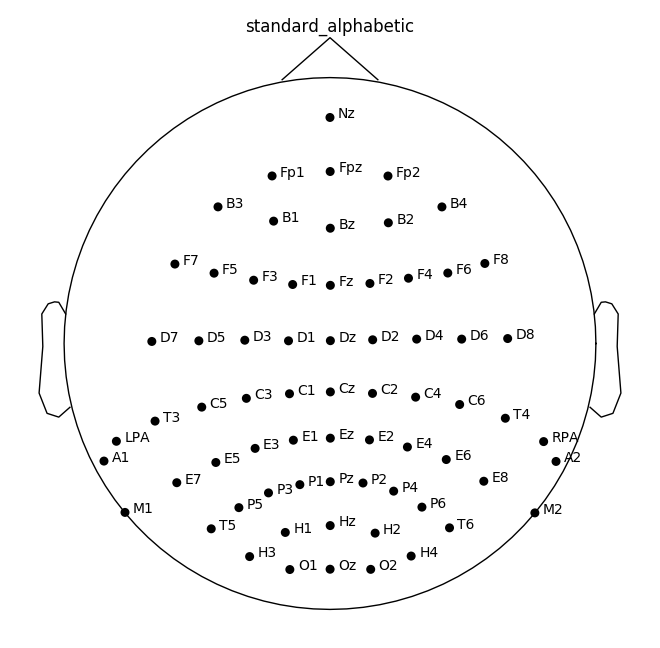

In [8]:
print(mne.channels.get_builtin_montages())
montage = mne.channels.read_montage("standard_alphabetic")
montage.plot()

In [9]:
raw.set_montage(montage, set_dig=True)

<RawArray  |  None, n_channels x n_times : 20 x 58820 (235.3 sec), ~9.0 MB, data loaded>

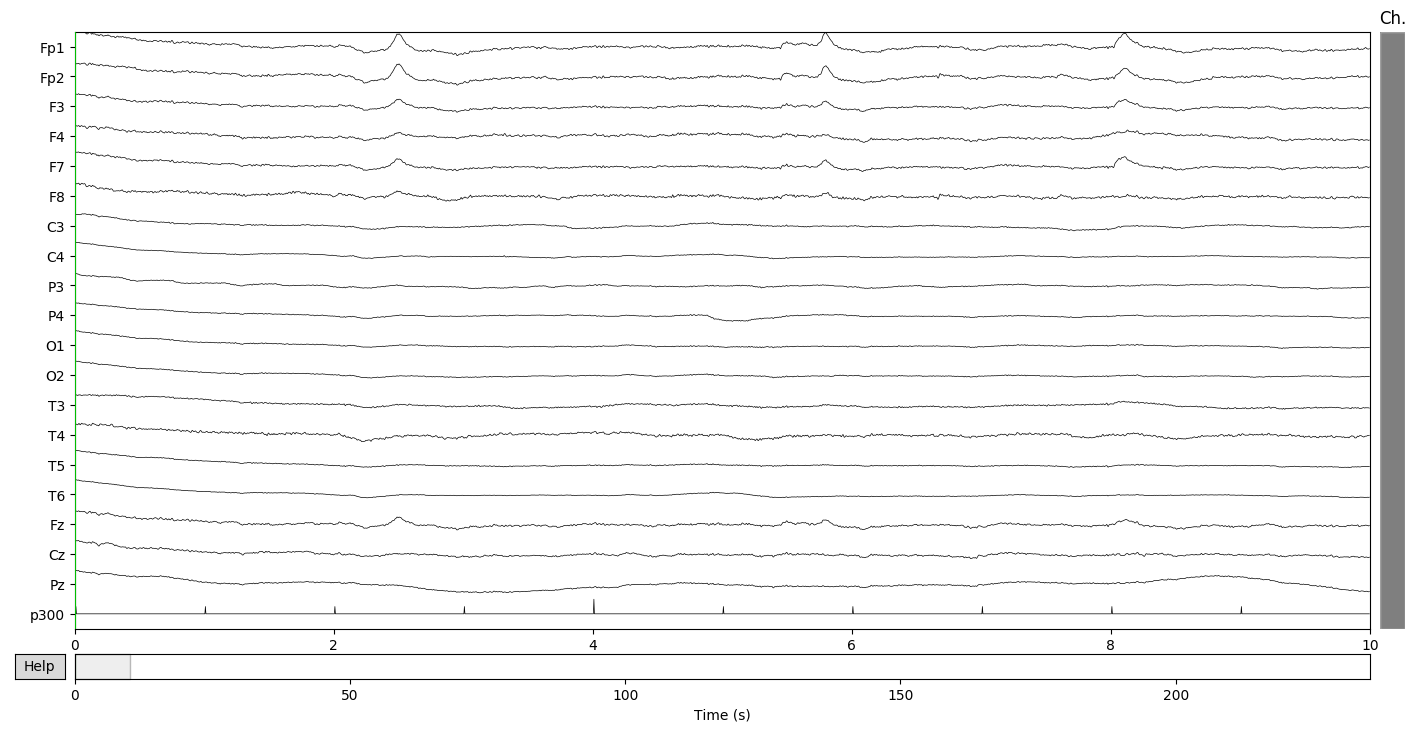

In [10]:
scalings = {'eeg': 0.1}
raw.plot(scalings=scalings)

In [11]:
mne_events = mne.find_events(raw, consecutive=True)

233 events found
Event IDs: [1 2]


In [15]:
import plotly.offline as py
from plotly import tools
from plotly.graph_objs import Layout, layout, Scatter, Annotation, Annotations, Data, Figure, Marker, Font

In [16]:
picks = mne.pick_types(raw.info, eeg=True, exclude=[])
start, stop = raw.time_as_index([0, 10])

n_channels = 19
data, times = raw[picks[:n_channels], start:stop]
ch_names = [raw.info['ch_names'][p] for p in picks[:n_channels]]

In [17]:
step = 1. / n_channels
kwargs = dict(domain=[1 - step, 1], showticklabels=False, zeroline=False, showgrid=False)

# create objects for layout and traces
layout = Layout(yaxis=layout.YAxis(kwargs), showlegend=False)
traces = [Scatter(x=times, y=data.T[:, 0])]

# loop over the channels
for ii in range(1, n_channels):
        kwargs.update(domain=[1 - (ii + 1) * step, 1 - ii * step])
        layout.update({'yaxis%d' % (ii + 1): YAxis(kwargs), 'showlegend': False})
        traces.append(Scatter(x=times, y=data.T[:, ii], yaxis='y%d' % (ii + 1)))

# add channel names using Annotations
annotations = Annotations([Annotation(x=-0.06, y=0, xref='paper', yref='y%d' % (ii + 1),
                                      text=ch_name, font=Font(size=9), showarrow=False)
                          for ii, ch_name in enumerate(ch_names)])
layout.update(annotations=annotations)

# set the size of the figure and plot it
layout.update(autosize=False, width=1000, height=600)
fig = Figure(data=Data(traces), layout=layout)
py.iplot(fig, filename='shared xaxis')

In [20]:
picks = mne.pick_types(raw.info, eeg=True, meg=False, stim=True, exclude=[])
raw.save('sample_vis_raw.fif', tmin=0., tmax=150., picks=picks, overwrite=True)

Writing /home/clayton/science/CANlab/WAViMedEEG/sample_vis_raw.fif
Closing /home/clayton/science/CANlab/WAViMedEEG/sample_vis_raw.fif [done]


In [23]:
raw_beta = mne.io.Raw("sample_vis_raw.fif", preload=True)  # reload data with preload for filtering

# keep beta band
raw_beta.filter(13.0, 30.0, method='iir', n_jobs=-1)

# save the result
raw_beta.save('sample_vis_raw.fif', overwrite=True)

# check if the info dictionary got updated
print(raw_beta.info['highpass'], raw_beta.info['lowpass'])

Opening raw data file sample_vis_raw.fif...
    Range : 0 ... 37500 =      0.000 ...   150.000 secs
Ready.
Reading 0 ... 37500  =      0.000 ...   150.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 13.00, 30.00 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Overwriting existing file.
Writing /home/clayton/science/CANlab/WAViMedEEG/sample_vis_raw.fif
Closing /home/clayton/science/CANlab/WAViMedEEG/sample_vis_raw.fif [done]
13.0 30.0


[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:    0.5s finished


In [24]:
events = mne.find_events(raw, stim_channel='p300')
print(events[:5])  # events is a 2d array

233 events found
Event IDs: [1 2]
[[   2    0    1]
 [ 252    0    1]
 [ 502    0    1]
 [ 752    0    1]
 [1002    0    2]]


In [30]:
print(len(events[events[:, 2] == 1]))
print(len(events[events[:, 2] == 2]))

195
38


In [31]:
len(events)

233

In [32]:
raw.ch_names.index('p300')

19

In [33]:
raw = mne.io.Raw("sample_vis_raw.fif", preload=True)  # reload data with preload for filtering
raw.filter(1, 40, method='iir')

Opening raw data file sample_vis_raw.fif...
    Range : 0 ... 37500 =      0.000 ...   150.000 secs
Ready.
Reading 0 ... 37500  =      0.000 ...   150.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB



<Raw  |  sample_vis_raw.fif, n_channels x n_times : 20 x 37501 (150.0 sec), ~5.8 MB, data loaded>

In [35]:
d, t = raw[raw.ch_names.index('p300'), :]
plt.plot(d[0,:10000])
py.iplot_mpl(plt.gcf())

In [37]:
event_ids = ['1', '2']
fig = mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, show=False)

# convert plot to plotly
update = dict(layout=dict(showlegend=True), data=[dict(name=e) for e in event_ids])
py.iplot_mpl(plt.gcf())

In [39]:
event_id = dict(reg=1, odd=2)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

In [40]:
event_id

{'reg': 1, 'odd': 2}

In [41]:
picks = mne.pick_types(raw.info, eeg=True, stim=False, exclude='bads')

In [42]:
baseline = (None, 0)  # means from the first instant to t = 0

In [43]:
# reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

In [45]:
# epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=baseline, reject=reject)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=baseline)

233 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [47]:
# from mne.fixes import Counter

# # drop bad epochs
# epochs.drop_bad_epochs()
# drop_log = epochs.drop_log

# # calculate percentage of epochs dropped for each channel
# perc = 100 * np.mean([len(d) > 0 for d in drop_log if not any(r in ['IGNORED'] for r in d)])
# scores = Counter([ch for d in drop_log for ch in d if ch not in ['IGNORED']])
# ch_names = np.array(list(scores.keys()))
# counts = 100 * np.array(list(scores.values()), dtype=float) / len(drop_log)
# order = np.flipud(np.argsort(counts))

In [48]:
# from plotly.graph_objs import Data, Layout, Bar, YAxis, Figure

# data = Data([
#     Bar(
#         x=ch_names[order],
#         y=counts[order]
#     )
# ])
# layout = Layout(title='Drop log statistics', yaxis=YAxis(title='% of epochs rejected'))

# fig = Figure(data=data, layout=layout)
# py.iplot(fig)

In [49]:
# epochs.save('sample-epo.fif')

In [50]:
evoked = epochs.average()

In [52]:
fig = evoked.plot(show=False)  # butterfly plots
update = dict(layout=dict(showlegend=False), data=[dict(name=raw.info['ch_names'][p]) for p in picks[:10]])
py.iplot_mpl(fig)

/home/clayton/.local/lib/python3.7/site-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/home/clayton/.local/lib/python3.7/site-packages/plotly/matplotlylib/renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [57]:
# topography plots
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='eeg');

In [58]:
epochs_data = epochs['odd'].get_data()
print(epochs_data.shape)

Loading data for 38 events and 176 original time points ...
14 bad epochs dropped
(24, 19, 176)


In [62]:
evokeds = [epochs[k].average() for k in event_id]
from mne.viz import plot_topo
layout = mne.find_layout(epochs.info)
plot_topo(evokeds, layout=layout, color=['blue', 'orange']);

ImportError: cannot import name 'plot_topo' from 'mne.viz' (/home/clayton/.local/lib/python3.7/site-packages/mne/viz/__init__.py)